In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [3]:
from sklearn.datasets import load_iris 
iris = load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['flowers']=df['target'].apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
x=df.drop(['target','flowers'],axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [17]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
125,7.2,3.2,6.0,1.8
95,5.7,3.0,4.2,1.2
76,6.8,2.8,4.8,1.4
23,5.1,3.3,1.7,0.5


In [28]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
125,7.2,3.2,6.0,1.8
95,5.7,3.0,4.2,1.2
76,6.8,2.8,4.8,1.4
23,5.1,3.3,1.7,0.5


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [22]:
y_pred=knn.predict(x_test)

In [31]:
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.head()

,0
0,0
1,2
2,1
3,1
4,0


In [44]:
new_df=pd.concat([x_test,y_pred_df],ignore_index=True,axis=1)
new_df.head()

,0,1,2,3,4
22,4.6,3.6,1.0,0.2,1.0
125,7.2,3.2,6.0,1.8,NaN
95,5.7,3.0,4.2,1.2,NaN
76,6.8,2.8,4.8,1.4,NaN
23,5.1,3.3,1.7,0.5,0.0


In [48]:
new_df.rename(columns={0:'Sepal Length',1:'Sepal Width',2:'Petal Length',3:'Petal Width',4:'target'},inplace=True)
new_df.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,target
22,4.6,3.6,1.0,0.2,1.0
125,7.2,3.2,6.0,1.8,NaN
95,5.7,3.0,4.2,1.2,NaN
76,6.8,2.8,4.8,1.4,NaN
23,5.1,3.3,1.7,0.5,0.0


In [49]:
df0=new_df[new_df.target==0]
df1=new_df[new_df.target==1]
df2=new_df[new_df.target==2]


In [51]:
df1

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
22,4.6,3.6,1.0,0.2,1.0
8,4.4,2.9,1.4,0.2,1.0
14,5.8,4.0,1.2,0.2,1.0
2,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,1.0
6,NaN,NaN,NaN,NaN,1.0
7,NaN,NaN,NaN,NaN,1.0
19,NaN,NaN,NaN,NaN,1.0
21,NaN,NaN,NaN,NaN,1.0
24,NaN,NaN,NaN,NaN,1.0


In [54]:
df2

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
1,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,2.0
13,NaN,NaN,NaN,NaN,2.0
15,NaN,NaN,NaN,NaN,2.0
16,NaN,NaN,NaN,NaN,2.0
17,NaN,NaN,NaN,NaN,2.0
25,NaN,NaN,NaN,NaN,2.0


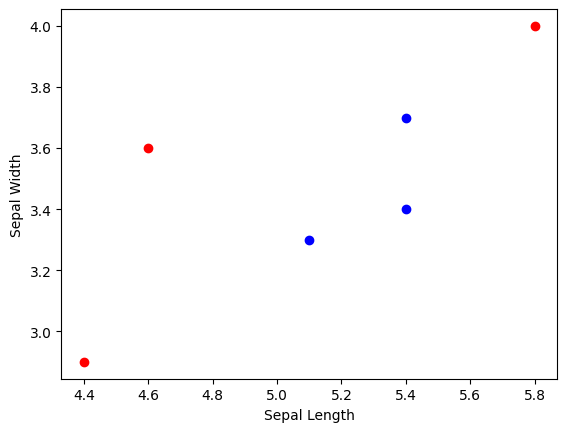

In [53]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(df0['Sepal Length'],df0['Sepal Width'],color='blue',label='setosa')
plt.scatter(df1['Sepal Length'],df1['Sepal Width'],color='red',label='veriscolor')
plt.scatter(df2['Sepal Length'],df2['Sepal Width'],color='green',label='virginica')


using SVM 

In [57]:
from sklearn import svm 
model=svm.SVC()
model.fit(x_train,y_train)


SVC()

In [58]:
svc_pred=model.predict(x_test)
svc_pred

array([0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       1, 0, 1, 2, 1, 0, 0, 0])

In [61]:
svc_pred_df=pd.DataFrame(svc_pred)
svc_pred_df.head()

,0
0,0
1,2
2,1
3,1
4,0


In [63]:
from sklearn import metrics
print(f"the accuracy of SVC is {metrics.accuracy_score(svc_pred,y_test)}")

the accuracy of SVC is 1.0


using Decission Tree 

In [68]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train) 
prediction=model.predict(x_test) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,y_test))



The accuracy of the Decision Tree using Petals is: 1.0
